# First tests with RoBERTA on agnews

- total number of samples: 500
- model: "roberta-large"
- dataset: agnews
- LLM for synthetic data generation: "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split

# CHANGE WORKING DIRECTORY TO ROOT
current_dir = os.path.basename(os.getcwd())
if current_dir == "src":
    os.chdir("..") # Move up by 1
elif os.path.basename(os.getcwd()) == "bai-thesis-nlp":  
    pass # If already at root, stay there
else:
    os.chdir("../..") # Move up by 2 otherwise
     
from src._utils._helpers import get_generated_examples_df
from src._utils._run_multiclassRoBERTA import main_multiclassRoBERTA

In [ ]:
FOLDER_DIR = "src/agnews/experiments/RoBERTA_500samples"
LOG_DIR = os.path.join(FOLDER_DIR, "RoBERTA_log.json")

### LOAD DATA ###
# real data
real_train_df = pd.read_csv("real_data/train/agnewstrainAll.csv").rename(columns={"2": "text", "3": "label"})
real_train_df.drop(columns=["0", "1"], inplace=True)

# Take 500 samples for dev set
real_train_df, dev_df = train_test_split(real_train_df, test_size=500, random_state=42, stratify=real_train_df["label"])

# synthetic data (generic and targeted)
syn_generic_df, _ = get_generated_examples_df("synthetic_data/datasets/syn_agnews_baseline_500.json")
syn_targeted_df, _ = get_generated_examples_df("synthetic_data/datasets/syn_agnews_targeted+tags_500.json")
syn_targeted_df = syn_targeted_df.drop(columns=["phenomena"])

## 1. 500 Real

In [12]:
results = []
name = "exp_500real"
train_details = main_multiclassRoBERTA(
    real_df=real_train_df,
    synth_df=None,
    dev_df=dev_df,
    synth_ratio=0.0,
    max_samples=500,
    output_dir=os.path.join(FOLDER_DIR, name),
    log_dir=LOG_DIR,
    generation_method=None,
    save_model=True,
    save_dataset=True,
)
print("\nTRAIN DETAILS:")
print(json.dumps(train_details, indent=4))

res = train_details["metrics_dev"]
res["method"] = name.replace("exp_", "")
results.append(res)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1 Micro,F1 Macro,Accuracy
1,1.182500,0.748447,0.730000,0.427967,0.730000
2,0.519700,0.396878,0.888000,0.820868,0.888000


💾 experiment saved to: src/agnews/experiments/RoBERTA_500samples/exp_500real

🚀 Metrics on dev set: {'f1_micro': '0.8880', 'f1_macro': '0.8209', 'accuracy': '0.8880'}

TRAIN DETAILS:
{
    "experiment_name": "exp_500real",
    "experiment_dir": "src/agnews/experiments/RoBERTA_500samples/exp_500real",
    "generation_method": null,
    "timestamp": "2025-03-16T16:10:02.516038",
    "model": "roberta-base",
    "train_size": 500,
    "dev_size": 500,
    "synthetic_ratio": 0.0,
    "train_time_seconds": 28.713349103927612,
    "metrics_dev": {
        "f1_micro": 0.888,
        "f1_macro": 0.8208676816486664,
        "accuracy": 0.888
    }
}


## 2. 250 Real + 250 Generic Augmentation

In [ ]:
name = "exp_250real_250generic"
train_details = main_multiclassRoBERTA(
    real_df=real_train_df,
    synth_df=syn_generic_df, # Generic Augmentation
    dev_df=dev_df,
    synth_ratio=0.5, # 50% of the data is synthetic
    max_samples=500,
    output_dir=os.path.join(FOLDER_DIR, name),
    log_dir=LOG_DIR,
    generation_method="generic augmentation",
    save_model=True,
    save_dataset=True,
)
display(train_details)

res = train_details["metrics_dev"]
res["method"] = name.replace("exp_", "")
results.append(res)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Accuracy,F1 Macro
1,1.130500,0.412698,0.882000,0.882000,0.800361
2,0.497900,0.297253,0.910000,0.910000,0.868144
3,0.293600,0.333257,0.904000,0.904000,0.854676
4,0.157600,0.351670,0.912000,0.912000,0.864202
5,0.108800,0.460132,0.900000,0.900000,0.855615
6,0.075300,0.477620,0.902000,0.902000,0.855902
7,0.037200,0.498700,0.896000,0.896000,0.850865
8,0.024400,0.518306,0.896000,0.896000,0.851775


💾 experiment saved to: src/agnews/experiments/exp_250real_250generic
{'accuracy': '0.9120', 'precision': '0.9097', 'recall': '0.9120', 'f1': '0.9084'}


{'experiment_name': 'exp_250real_250generic',
 'experiment_dir': 'src/agnews/experiments/exp_250real_250generic',
 'generation_method': 'generic augmentation',
 'timestamp': '2025-03-16T01:24:15.697235',
 'model': 'roberta-large',
 'train_size': 500,
 'dev_size': 500,
 'synthetic_ratio': 0.5,
 'train_time_seconds': 299.1383144855499,
 'metrics_dev': {'accuracy': 0.912,
  'precision': 0.9096506238061433,
  'recall': 0.912,
  'f1': 0.9084011862595891}}

## 3. 250 Real + 250 Targeted Augmentation

In [ ]:
name = "exp_250real_250targeted"
train_details = main_multiclassRoBERTA(
    real_df=real_train_df,
    synth_df=syn_targeted_df, # Targeted Augmentation
    dev_df=dev_df,
    synth_ratio=0.5, # 50% of the data is synthetic
    max_samples=500,
    output_dir=os.path.join(FOLDER_DIR, name),
    log_dir=LOG_DIR,
    generation_method="targeted augmentation",
    save_model=True,
    save_dataset=True,
)
display(train_details)

res = train_details["metrics_dev"]
res["method"] = name.replace("exp_", "")
results.append(res)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Accuracy,F1 Macro
1,1.099300,0.443672,0.870000,0.870000,0.777154
2,0.433800,0.340546,0.894000,0.894000,0.836344
3,0.240500,0.361814,0.910000,0.910000,0.861642
4,0.167100,0.554440,0.880000,0.880000,0.826225
5,0.100800,0.464890,0.908000,0.908000,0.865575
6,0.056100,0.497637,0.912000,0.912000,0.861275
7,0.035700,0.485546,0.920000,0.920000,0.881810
8,0.017300,0.488898,0.924000,0.924000,0.886858


💾 experiment saved to: src/agnews/experiments/exp_250real_250targeted
{'accuracy': '0.9240', 'precision': '0.9235', 'recall': '0.9240', 'f1': '0.9221'}


{'experiment_name': 'exp_250real_250targeted',
 'experiment_dir': 'src/agnews/experiments/exp_250real_250targeted',
 'generation_method': 'targeted augmentation',
 'timestamp': '2025-03-16T01:29:28.139525',
 'model': 'roberta-large',
 'train_size': 500,
 'dev_size': 500,
 'synthetic_ratio': 0.5,
 'train_time_seconds': 298.5188195705414,
 'metrics_dev': {'accuracy': 0.924,
  'precision': 0.9235081867798666,
  'recall': 0.924,
  'f1': 0.9221451372984603}}

## 4. 500 Generic Augmentation

In [ ]:
name = "exp_500generic"
train_details = main_multiclassRoBERTA(
    real_df=None,
    synth_df=syn_generic_df, # Generic Augmentation
    dev_df=dev_df,
    synth_ratio=1.0, # 100% of the data is synthetic
    max_samples=500,
    output_dir=os.path.join(FOLDER_DIR, name),
    log_dir=LOG_DIR,
    generation_method="generic augmentation",
    save_model=True,
    save_dataset=True,
)
display(train_details)

res = train_details["metrics_dev"]
res["method"] = name.replace("exp_", "")
results.append(res)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Accuracy,F1 Macro
1,0.958600,0.687914,0.762000,0.762000,0.724130
2,0.480900,0.811682,0.694000,0.694000,0.671680
3,0.402600,0.827876,0.664000,0.664000,0.602715
4,0.267400,0.739060,0.716000,0.716000,0.666758
5,0.205400,1.005670,0.642000,0.642000,0.599128
6,0.145400,0.826668,0.712000,0.712000,0.665837
7,0.102200,0.958910,0.696000,0.696000,0.654141
8,0.084300,0.868857,0.718000,0.718000,0.673581


💾 experiment saved to: src/agnews/experiments/exp_500generic
{'accuracy': '0.7620', 'precision': '0.8317', 'recall': '0.7620', 'f1': '0.7781'}


{'experiment_name': 'exp_500generic',
 'experiment_dir': 'src/agnews/experiments/exp_500generic',
 'generation_method': 'generic augmentation',
 'timestamp': '2025-03-16T01:34:42.083217',
 'model': 'roberta-large',
 'train_size': 500,
 'dev_size': 500,
 'synthetic_ratio': 1.0,
 'train_time_seconds': 300.7855670452118,
 'metrics_dev': {'accuracy': 0.762,
  'precision': 0.831743571019473,
  'recall': 0.762,
  'f1': 0.7780990333003154}}

## 5. 500 Targeted Augmentation

In [ ]:
name = "exp_500targeted"
train_details = main_multiclassRoBERTA(
    real_df=None,
    synth_df=syn_targeted_df, # Targeted Augmentation
    dev_df=dev_df,
    synth_ratio=1.0, # 100% of the data is synthetic
    max_samples=500,
    output_dir=os.path.join(FOLDER_DIR, name),
    log_dir=LOG_DIR,
    generation_method="targeted augmentation",
    save_model=True,
    save_dataset=True,
)
display(train_details)

res = train_details["metrics_dev"]
res["method"] = name.replace("exp_", "")
results.append(res)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Accuracy,F1 Macro
1,0.990800,0.576532,0.852000,0.852000,0.805969
2,0.483700,0.885444,0.708000,0.708000,0.672196
3,0.328400,0.652601,0.804000,0.804000,0.771344
4,0.261600,0.658721,0.762000,0.762000,0.731043
5,0.167700,0.941585,0.684000,0.684000,0.664427
6,0.126200,1.170224,0.642000,0.642000,0.631658
7,0.076700,0.934078,0.706000,0.706000,0.684594
8,0.036000,1.031700,0.690000,0.690000,0.672748


💾 experiment saved to: src/agnews/experiments/exp_500targeted
{'accuracy': '0.8520', 'precision': '0.8617', 'recall': '0.8520', 'f1': '0.8538'}


{'experiment_name': 'exp_500targeted',
 'experiment_dir': 'src/agnews/experiments/exp_500targeted',
 'generation_method': 'targeted augmentation',
 'timestamp': '2025-03-16T01:39:56.132102',
 'model': 'roberta-large',
 'train_size': 500,
 'dev_size': 500,
 'synthetic_ratio': 1.0,
 'train_time_seconds': 300.2718062400818,
 'metrics_dev': {'accuracy': 0.852,
  'precision': 0.8616714544545336,
  'recall': 0.852,
  'f1': 0.8538414257137661}}

## Results

In [ ]:
df_results = pd.DataFrame(results)
new_order = ["method"] + [col for col in df_results.columns if col != "method"]
df_results = df_results[new_order]
df_results.to_csv("src/agnews/experiments/results_RoBERTA.csv", index=False)
display(df_results.round(3))

,method,accuracy,precision,recall,f1
0,500real,0.924,0.922966,0.924,0.921379
1,250real_250generic,0.912,0.909651,0.912,0.908401
2,250real_250targeted,0.924,0.923508,0.924,0.922145
3,500generic,0.762,0.831744,0.762,0.778099
4,500targeted,0.852,0.861671,0.852,0.853841


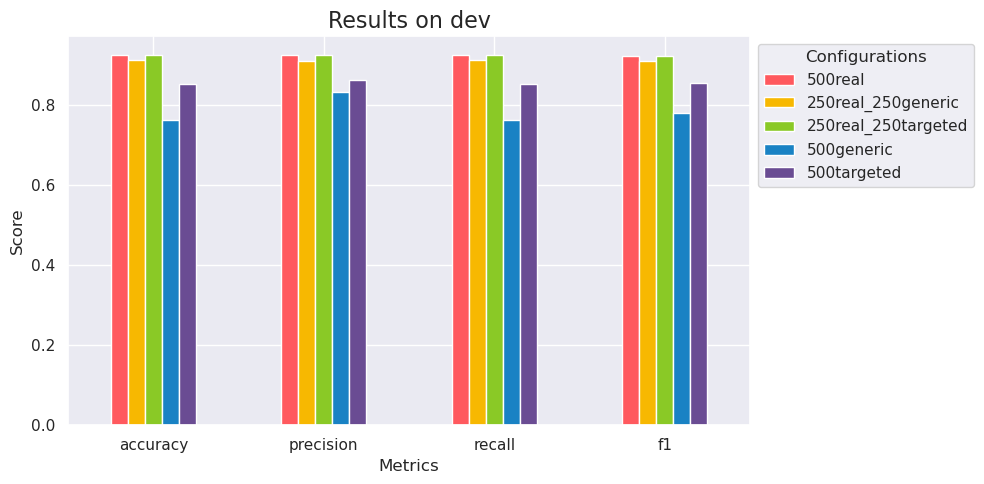

In [ ]:
df_results = pd.read_csv("src/agnews/experiments/results_RoBERTA.csv")

plot_df = df_results.set_index('method')
colors = ['#ff595e', '#f7b801', '#8ac926', '#1982c4', '#6a4c93']
ax = plot_df.T.plot(kind='bar', figsize=(10, 5), color=colors)

plt.title('Results on dev', fontsize=16)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Configurations', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()